Price,Close,High,Low,Open,Volume,MA,Strategy,asset_cumulative,strategy_cumulative
Date,,,,,,,,,
1993-11-11,26.050598,26.191033,26.033044,26.120815,88900,25.163892,NaN,NaN,NaN
1993-11-12,26.173456,26.261228,26.085685,26.103239,108200,25.173553,1.0,0.004716,0.004716
1993-11-15,26.155901,26.226118,26.085684,26.226118,243300,25.182263,1.0,0.004042,0.004042
1993-11-16,26.278784,26.296338,26.103241,26.208567,492600,25.191329,1.0,0.008759,0.008759
1993-11-17,26.138340,26.296329,26.068123,26.296329,39600,25.198400,1.0,0.003368,0.003368
...,...,...,...,...,...,...,...,...,...
2026-01-26,692.729980,694.130005,689.919983,690.489990,60473800,634.959031,1.0,25.591711,3.015399
2026-01-27,695.489990,696.530029,693.570007,694.179993,55506100,635.717063,1.0,25.697659,3.031397
2026-01-28,695.419983,697.840027,693.940002,697.049988,61172200,636.593908,1.0,25.694972,3.030992


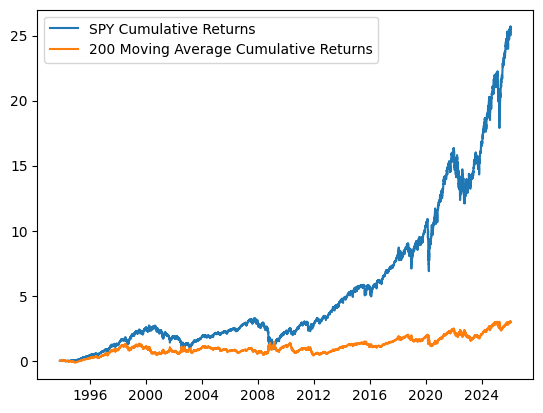

In [17]:
# Imports
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Variablen
TICKER = 'SPY'
WINDOW = 200

# Funktionen
def get_data():
    # Downloaden der Daten von Tickervariable in eine Dataframe
    df = yf.download(
    TICKER,
    period="max",
    progress=False)
    df.columns = df.columns.get_level_values(0)
    df['MA'] = df['Close'].rolling(WINDOW).mean()
    return df.dropna()

def add_strategy(df):
    df['Strategy'] = np.where(df['Close'] > df['MA'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df):
    df['asset_cumulative'] = np.cumprod(1 + df['Close'].pct_change()) -1
    df['strategy_cumulative'] = np.cumprod(1 + df['Close'].pct_change() * df['Strategy']) -1

    # plot the returns
    plt.plot(df['asset_cumulative'])
    plt.plot(df['strategy_cumulative'])
    plt.legend([f'{TICKER} Cumulative Returns', f'{WINDOW} Moving Average Cumulative Returns'])
    return df

def main():
    df = get_data()
    df = add_strategy(df)
    df = test_strategy(df)
    return df

main()